In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [43]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data = np.array(data)  # converting pandas data frame to numpy array to use linear alegbra on it
m,n = data.shape
np.random.shuffle(data)

In [45]:
data_test = data[0:1000].T #first thousand examples for testing. Each column is an example instead of each row after transposing
y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [46]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_train

array([2, 7, 5, ..., 1, 7, 7])

In [48]:
x_train.shape

(784, 41000)

In [49]:
y_train.shape

(41000,)

In [50]:
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

def xavier_init(shape):
    return np.random.randn(*shape) * np.sqrt(2.0 / np.sum(shape))

def init_params():
    W1 = xavier_init((10, 784))
    b1 = np.zeros((10, 1))
    W2 = xavier_init((10, 10))
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [51]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [52]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [53]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [54]:
def ReLU_deriv(Z): #for back prop
    return Z > 0

In [55]:
# def one_hot(Y): #To convert categorical labels into one-hot encoded labels
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

data = pd.DataFrame(data)
def one_hot(Y):
    one_hot_Y = pd.get_dummies(Y).T.values
    return one_hot_Y
data = np.array(data)

In [56]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [57]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [58]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [59]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [60]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [61]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 200)

Iteration:  0
[7 2 7 ... 7 7 7] [2 7 5 ... 1 7 7]
0.08926829268292683
Iteration:  10
[3 0 0 ... 7 7 7] [2 7 5 ... 1 7 7]
0.3021219512195122
Iteration:  20
[2 7 2 ... 3 7 7] [2 7 5 ... 1 7 7]
0.41368292682926827
Iteration:  30
[2 7 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.5134634146341464
Iteration:  40
[2 7 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.6055609756097561
Iteration:  50
[2 7 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.6968292682926829
Iteration:  60
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.7561951219512195
Iteration:  70
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.7868780487804878
Iteration:  80
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8011951219512196
Iteration:  90
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8115365853658537
Iteration:  100
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8193658536585365
Iteration:  110
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8262926829268292
Iteration:  120
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8327317073170731
Iteration:  130
[2 9 2 ... 1 7 7] [2 7 5 ... 1 7 7]
0.8379268292682926
Iteration:  140

In [62]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


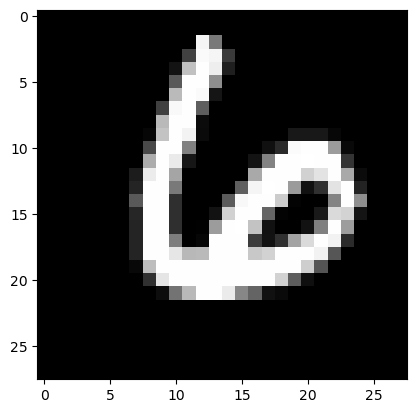

Prediction:  [1]
Label:  1


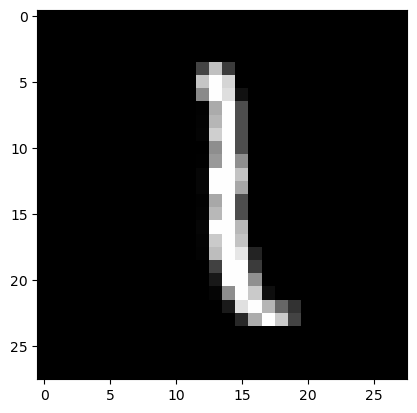

Prediction:  [7]
Label:  0


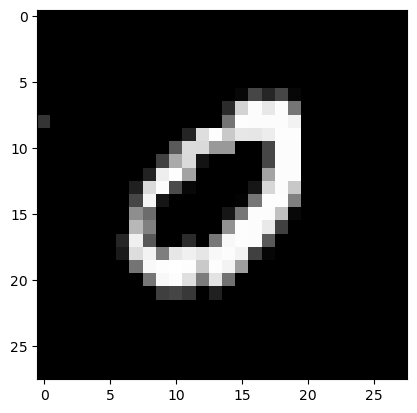

Prediction:  [4]
Label:  4


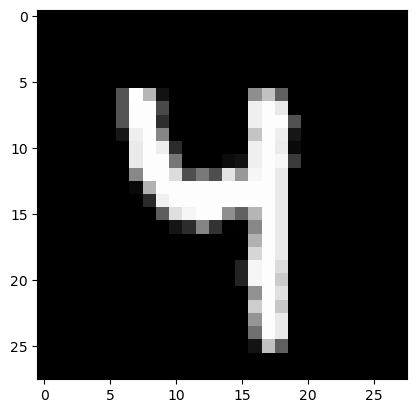

In [63]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(17, W1, b1, W2, b2)
test_prediction(23, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [64]:
test_predictions = make_predictions(x_test, W1, b1, W2, b2)
get_accuracy(test_predictions, y_test)

[4 5 5 9 9 2 3 4 1 5 7 6 8 1 9 8 6 6 4 6 0 0 9 0 3 7 5 5 0 7 2 6 9 2 0 1 9
 5 2 9 8 6 3 1 9 6 0 1 5 6 6 1 7 1 0 9 6 0 2 6 7 6 9 8 1 7 5 8 2 4 7 2 3 5
 8 6 5 4 2 3 3 7 4 7 7 4 7 8 1 4 2 6 7 9 3 7 4 3 7 3 4 8 2 7 5 3 3 7 5 7 2
 1 6 5 5 1 5 3 4 3 2 7 7 7 0 5 3 0 1 8 9 3 6 2 9 0 3 2 8 4 8 7 3 7 3 1 7 3
 6 4 8 3 1 1 8 7 4 3 9 9 6 6 7 1 7 0 5 8 0 4 2 3 9 2 5 1 2 1 1 9 7 8 5 4 7
 5 4 4 0 9 2 0 3 8 3 2 6 5 2 4 3 4 4 9 4 7 6 0 1 0 3 0 7 7 1 1 3 1 5 9 7 4
 6 3 6 0 2 1 6 3 0 2 2 7 6 5 9 7 1 4 4 9 0 2 6 9 7 0 3 4 0 3 7 8 5 4 6 4 5
 3 3 8 5 0 1 8 6 3 8 5 8 9 0 3 6 7 5 6 2 0 0 6 8 3 0 3 0 7 8 6 9 9 1 5 4 2
 2 3 4 5 2 9 6 9 5 6 3 3 8 9 3 2 2 7 0 3 3 7 4 2 1 8 1 2 0 2 3 0 0 7 0 8 0
 0 7 1 9 3 0 2 7 0 1 3 8 1 6 7 9 0 4 3 6 8 3 5 2 6 8 0 6 0 2 7 0 3 1 6 6 2
 2 6 0 5 4 9 9 7 2 4 1 0 6 7 9 3 5 9 8 6 7 7 1 0 2 1 1 4 7 3 8 3 6 1 6 4 4
 8 8 6 9 7 0 5 8 9 8 1 2 9 4 9 5 6 3 9 7 3 9 0 7 4 4 0 0 3 2 4 0 7 7 6 8 9
 2 7 2 3 5 1 4 0 8 8 1 8 3 9 4 8 3 8 5 5 3 5 6 8 1 4 3 1 6 3 1 2 5 6 4 7 9
 8 1 6 7 6 8 4 9 8 0 8 0 

0.857